In [1]:
import joypy
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [2]:
pwd

'/Users/in-divye.singh/Documents/Projects/PeptideGAN/antiviral-peptide-predictions-using-gan/src/visualization'

In [3]:
data = pd.read_csv("../../data/raw/avp_sequences.csv")

In [4]:
data

,Sequence
0,FLPLIGRVLSGIL
1,VVCACRRALCLPRERRAGFCRIRGRIHPLCCRR
2,RRCICTTRTCRFPYRRLGTCLFQNRVYTFCC
3,GRFKRFRKKFKKLFKKLSPVIPLLHLG
4,GIGTKILGGVKTALKGALKELASTYAN
...,...
1999,LFGLIPSLIGGLVSAFK
2000,SLIGGLVSAFK
2001,VSAFK
2002,KHMHWHPPALNT


In [5]:
to_drop = [i for i, s in enumerate(data.Sequence) if " " in s]

In [6]:
data = data.drop(to_drop, axis=0)

In [7]:
def dipeptide_encoding(seq, n):
    """
    Returns n-Gram Motif frequency
    https://www.biorxiv.org/content/10.1101/170407v1.full.pdf
    """
    aa_list = list(seq)
    return {''.join(aa_list): n for aa_list, n in Counter(zip(*[aa_list[i:] for i in range(n)])).items() if
            not aa_list[0][-1] == (',')}

In [8]:
seq_vec = data.Sequence.apply(lambda x: dipeptide_encoding(x, 1)).to_list()
df = pd.DataFrame(seq_vec)
df = df.fillna(0)

In [9]:
df

,F,L,P,I,G,R,V,S,C,A,E,H,T,Y,Q,N,K,M,D,W
0,1.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,2.0,2.0,2.0,10.0,2.0,0.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,2.0,1.0,1.0,1.0,7.0,1.0,0.0,6.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
3,4.0,5.0,2.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
4,0.0,4.0,0.0,2.0,5.0,0.0,1.0,1.0,0.0,4.0,1.0,0.0,3.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,2.0,4.0,1.0,2.0,3.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1999,1.0,2.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2001,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [10]:
df.columns, len(df.columns)

(Index(['F', 'L', 'P', 'I', 'G', 'R', 'V', 'S', 'C', 'A', 'E', 'H', 'T', 'Y',
        'Q', 'N', 'K', 'M', 'D', 'W'],
       dtype='object'),
 20)

In [11]:
import matplotlib as mpl
import matplotlib.pylab as plt

In [12]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist = cmaplist[1:]

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

In [13]:
df = df.sort_index(axis=1)

In [31]:
%matplotlib inline

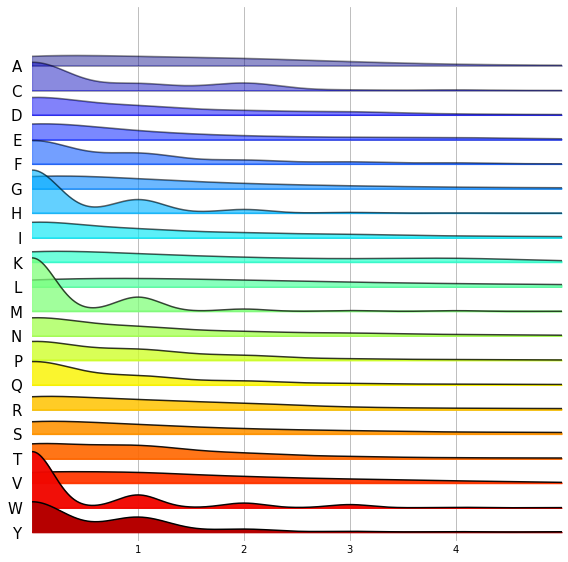

In [32]:
fig, axes = joypy.joyplot(df, column=list(df.columns), figsize=(8, 8), fade=True, colormap=cmap,
                          x_range=range(int(df.quantile(0.90).max())), grid=True, ylabelsize=15)